<a href="https://colab.research.google.com/github/rohit28900/Epilepsy_project/blob/main/GRU_epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import cohen_kappa_score
from keras.layers import Dropout
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import LeakyReLU
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rohit Data Set/data_comp.csv')

In [ ]:
df.head()

In [ ]:
df.rename(columns = {'Time':'Time(sec)'}, inplace = True)

In [ ]:
df.head()

In [ ]:
#len(df['Time(sec)'])
time=list(range(0, 91030, 10))
time=pd.DataFrame(time,columns =['Time(sec)'])

In [ ]:
time.head()

,Time(sec)
0,0
1,10
2,20
3,30
4,40


In [ ]:
df['Unnamed: 0'] = time['Time(sec)']

In [ ]:
df.head()

,Unnamed: 0,Epoch,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity,label,Label_P
0,0,0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109,0,0
1,10,1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487,0,0
2,20,2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299,0,0
3,30,3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424,0,0
4,40,4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735,0,0


In [ ]:
df.rename(columns = {'Unnamed: 0':'Times(sec)'}, inplace = True)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Times(sec),Epoch,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity,label,Label_P
0,0,0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109,0,0
1,10,1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487,0,0
2,20,2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299,0,0
3,30,3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424,0,0
4,40,4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735,0,0


In [ ]:
df2=df1.drop(['Epoch','label'], axis = 1)
#df1.drop(['label'], axis = 1)

In [ ]:
df2.columns

Index(['Times(sec)', 'Mean', 'Median', 'Varience', 'Kurtosis', 'Skewness',
       'Power', 'Entropy', 'Spectral_entropy', 'Zero_Crossing', 'Hust', 'Pfd',
       'Mobility', 'Complexity', 'Label_P'],
      dtype='object')

In [ ]:
y[0]

In [ ]:
X[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6)

In [ ]:
X_test.shape

(703, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train[0]

array([-0.05562013, -0.68197179, -0.62192336, -0.53319276, -0.49243916,
       -0.33582202])

In [ ]:
len(y_train)

2109

In [ ]:
X_train = X_train.reshape(X_train.shape[0],6, 1)
X_test = X_test.reshape(X_test.shape[0],6, 1)

In [ ]:
  model = keras.Sequential()
  model.add(keras.layers.GRU(32,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model.add(keras.layers.GRU(20, return_sequences=False, recurrent_activation='relu'))
  model.add(LeakyReLU(alpha=0.03))
  model.add(Dropout(0.5))
  model.add(keras.layers.Dense(3,activation="relu"))
  model.add(keras.layers.Dense(1,activation="sigmoid"))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
  model.summary()

In [ ]:
  model2 = keras.Sequential()
  model2.add(keras.layers.GRU(32,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model2.add(keras.layers.GRU(20, return_sequences=False, recurrent_activation='relu'))
  model2.add(LeakyReLU(alpha=0.07))
  model2.add(Dropout(0.5))
  model2.add(keras.layers.Dense(3,activation="relu"))
  model2.add(keras.layers.Dense(1,activation="sigmoid"))
  model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
  model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 6, 32)             3360      
                                                                 
 gru_3 (GRU)                 (None, 20)                3240      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20)                0         
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 6,667
Trainable params: 6,667
Non-traina

In [ ]:
  model3 = keras.Sequential()
  model3.add(keras.layers.GRU(32,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model3.add(LeakyReLU(alpha=0.07))
  model3.add(keras.layers.GRU(20,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model3.add(LeakyReLU(alpha=0.07))
  model3.add(Dropout(0.5))
  model3.add(keras.layers.GRU(10, return_sequences=False, recurrent_activation='relu'))
  model3.add(Dropout(0.5))
  model3.add(keras.layers.Dense(3,activation="relu"))
  model3.add(keras.layers.Dense(1,activation="sigmoid"))
  model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
  model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 6, 32)             3360      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6, 32)             0         
                                                                 
 gru_7 (GRU)                 (None, 6, 20)             3240      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6, 20)             0         
                                                                 
 dropout_4 (Dropout)         (None, 6, 20)             0         
                                                                 
 gru_8 (GRU)                 (None, 10)                960       
                                                                 
 dropout_5 (Dropout)         (None, 10)               

In [ ]:
  model4 = keras.Sequential()
  model4.add(keras.layers.GRU(32,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model4.add(LeakyReLU(alpha=0.05))
  model4.add(keras.layers.GRU(20,batch_input_shape = (None,6,1), return_sequences=True, recurrent_activation='relu'))
  model4.add(LeakyReLU(alpha=0.05))
  model4.add(Dropout(0.5))
  model4.add(keras.layers.GRU(10, return_sequences=False, recurrent_activation='relu'))
  model4.add(Dropout(0.5))
  model4.add(keras.layers.Dense(3,activation="relu"))
  model4.add(keras.layers.Dense(1,activation="sigmoid"))
  model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])
  model4.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
his = model3.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
66/66 [==============================] - 7s 27ms/step - loss: 0.5347 - true_positives: 1.0000 - true_negatives: 1908.0000 - false_positives: 9.0000 - false_negatives: 191.0000 - accuracy: 0.9052 - val_loss: 0.3026 - val_true_positives: 0.0000e+00 - val_true_negatives: 633.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 70.0000 - val_accuracy: 0.9004
Epoch 2/100
66/66 [==============================] - 1s 12ms/step - loss: 0.2885 - true_positives: 0.0000e+00 - true_negatives: 1917.0000 - false_positives: 0.0000e+00 - false_negatives: 192.0000 - accuracy: 0.9090 - val_loss: 0.2494 - val_true_positives: 0.0000e+00 - val_true_negatives: 633.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 70.0000 - val_accuracy: 0.9004
Epoch 3/100
66/66 [==============================] - 1s 12ms/step - loss: 0.2465 - true_positives: 0.0000e+00 - true_negatives: 1917.0000 - false_positives: 0.0000e+00 - false_negatives: 192.0000 - accuracy: 0.9090 - val_loss: 0.2086 - 

In [ ]:
X_test.shape

(703, 6, 1)

In [ ]:
y_test

In [ ]:
pred = model3.predict(X_test)

In [ ]:
pred.shape

(703, 1)

In [ ]:
for i in range(len(pred)):
    if pred[i] <0.5:
        pred[i]=0
    else:
        pred[i]=1

In [ ]:
pred = pred[:, 0]

In [ ]:
pred

In [ ]:
print('accuracy:',accuracy_score(y_test,pred))
print('precesion:',precision_score(y_test,pred))
print('recall:',recall_score(y_test,pred))
print('f1 score:',f1_score(y_test,pred))
print('AUC_curve:',roc_auc_score(y_test,pred))

accuracy: 0.9886201991465149
precesion: 0.9696969696969697
recall: 0.9142857142857143
f1 score: 0.9411764705882354
AUC_curve: 0.9555630783118935


In [ ]:
train_loss = his.history['loss']
test_loss = his.history['val_loss']

In [ ]:
epoch_count = range(1, len(train_loss) + 1)

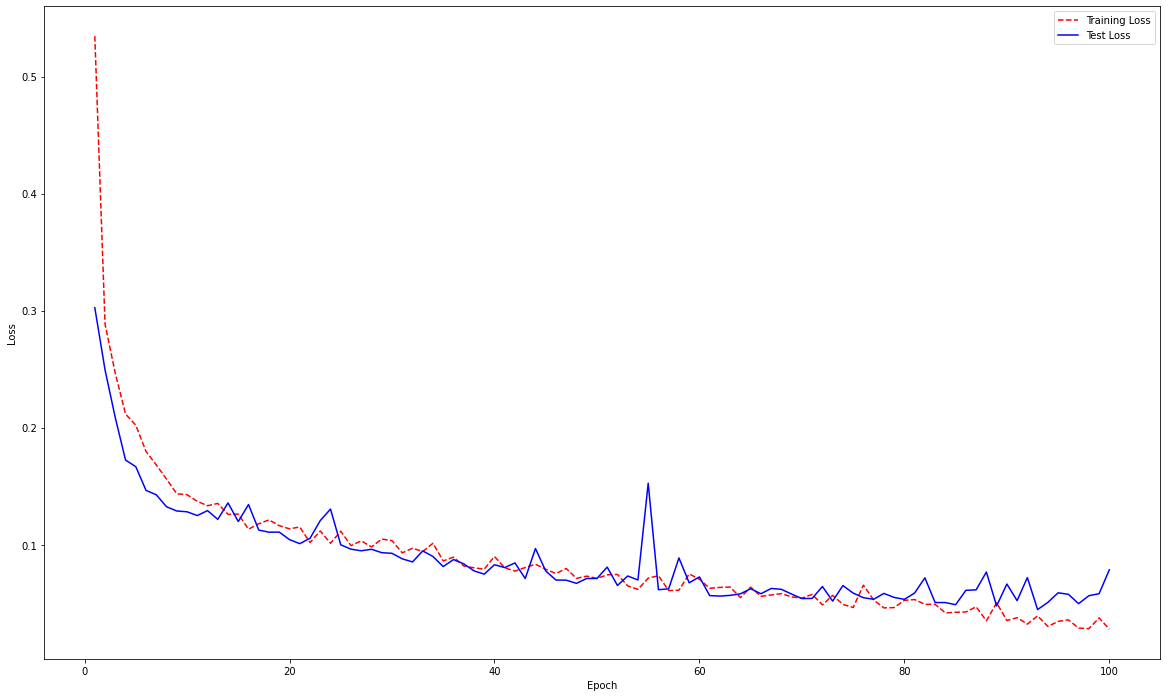

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('Epoch_loss_1.png')
plt.show();

In [ ]:
accuracy=accuracy_score(y_test,pred)


In [ ]:
accuracy=his.history['accuracy']
val_accuracy=his.history['val_accuracy']


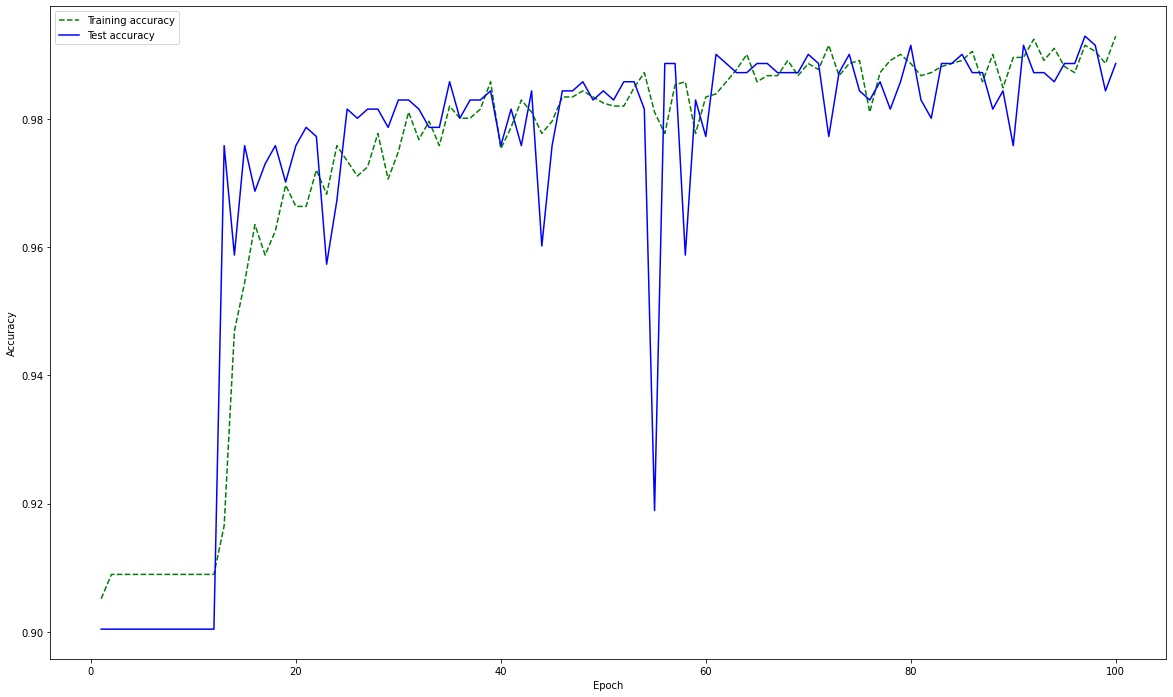

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count,accuracy, 'g--')
plt.plot(epoch_count,val_accuracy,'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('acc03.png')